## Ordinary Least Squares and Normal Equations to Estimate Linear Regression Coefficients/Parameters

<b>Idea:</b> Normal equations are equations obtained by setting equal to zero the partial derivatives of the sum of squared errors (least squares); normal equations allow one to estimate the parameters of a multiple linear regression.​

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

In [50]:
# Creating a demo dataframe with one feature and regression outout
X = [2, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
y = [196, 221, 136, 255, 244, 230, 232, 255, 267]
d = {'EngineSize':X, 'CO2emissions':y}
df = pd.DataFrame(data = d)

In [51]:
df

,EngineSize,CO2emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


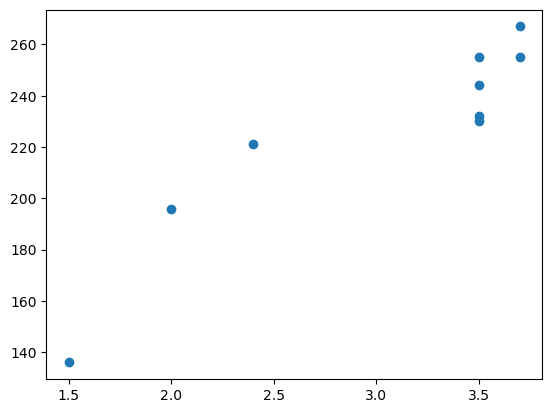

In [52]:
# Plotting features 'EngineSize' vs. target 'CO2emissions'
plt.scatter(x = df.EngineSize, y = df.CO2emissions)

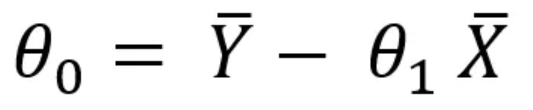

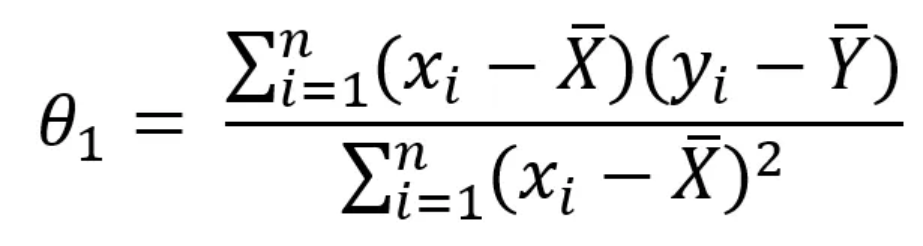

In [53]:
# Computing X_bar and y_bar
X_bar = np.mean(df['EngineSize'])
y_bar = np.mean(df['CO2emissions'])

In [54]:
x_bar, y_bar

(3.033333333333333, 226.22222222222223)

In [55]:
# Computing theta_1 and theta_0
theta_1 = sum( (df['EngineSize'] - x_bar) * (df['CO2emissions'] - y_bar) ) / sum( (df['EngineSize'] - x_bar) ** 2 )
theta_0 = y_bar - theta_1 * x_bar

In [56]:
theta_0, theta_1

(92.80266825965754, 43.98446833930704)

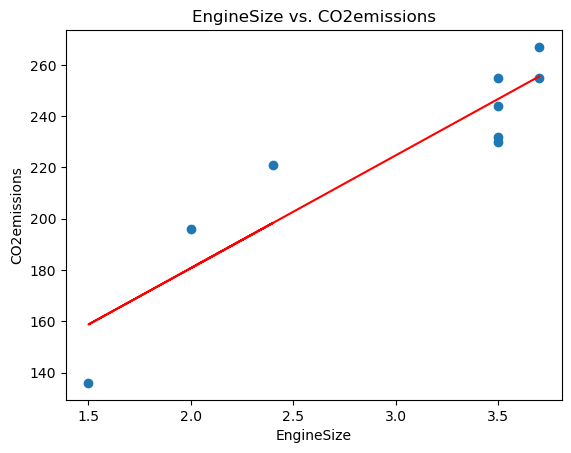

In [57]:
# Drawing the Simple Linear Regression Line
X =  df.EngineSize
y = theta_0 + theta_1 * df.EngineSize
plt.scatter(x = df.EngineSize, y = df.CO2emissions)
plt.plot(X, y, color  = "red")
plt.xlabel("EngineSize")
plt.ylabel("CO2emissions")
plt.title("EngineSize vs. CO2emissions")
plt.show()

In [58]:
# Comparing the results to sklearn library
mdl = LinearRegression()

In [59]:
X = np.array(df['EngineSize']).reshape(-1, 1)
y = df['CO2emissions']
mdl.fit(X, y)

LinearRegression()

In [60]:
mdl.intercept_, mdl.coef_

(92.80266825965754, array([43.98446834]))

## Multiple Linear Regression

In [61]:
# Generating a demo data for multiple linear regression
x1 = [2, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
x2 = [4, 4, 4, 6, 6, 6, 6, 6, 6]
x3 = [8.5, 9.6, 5.9, 11.1, 10.6, 10.0, 10.1, 11.1, 11.6]
y = [196, 221, 136, 255, 244, 230, 232, 255, 267]
d = {'EngineSize':x1, 'Cylinders':x2, 'FuelConsumptionComb':x3, 'CO2emissions':y}
df = pd.DataFrame(data = d)

In [62]:
df

,EngineSize,Cylinders,FuelConsumptionComb,CO2emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [63]:
# Defining the features (independet variables) and the target (dependent variable)
features = df[['EngineSize', 'Cylinders', 'FuelConsumptionComb']]
target = df['CO2emissions']

In [64]:
intercept = np.ones((features.shape[0], 1))
features = np.hstack((intercept, features))

In [65]:
# Creating a matrix representation of the features and adding a column that represents the intercept 'theta_0'
features

array([[ 1. ,  2. ,  4. ,  8.5],
       [ 1. ,  2.4,  4. ,  9.6],
       [ 1. ,  1.5,  4. ,  5.9],
       [ 1. ,  3.5,  6. , 11.1],
       [ 1. ,  3.5,  6. , 10.6],
       [ 1. ,  3.5,  6. , 10. ],
       [ 1. ,  3.5,  6. , 10.1],
       [ 1. ,  3.7,  6. , 11.1],
       [ 1. ,  3.7,  6. , 11.6]])

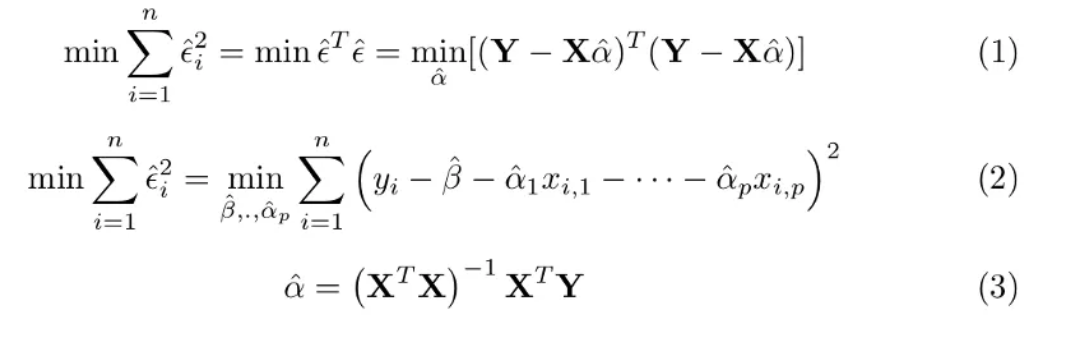

In [66]:
# Estimating the coefficients using the formula above
Xt_X_inv = np.linalg.inv(np.dot(features.T, features))
Xt_y = np.dot(features.T, target)
thetas = np.dot(Xt_X_inv, Xt_y)

In [67]:
thetas

array([-0.03512942, -0.67353407,  0.12638669, 23.14844163])

In [72]:
# Comparing the results to sklearn library
mdl2 = LinearRegression(fit_intercept = False)

In [73]:
mdl2.fit(features, target)

LinearRegression(fit_intercept=False)

In [75]:
mdl2.coef_

array([-0.03512942, -0.67353407,  0.12638669, 23.14844163])